<div style="display: flex; justify-content: space-between; align-items: center;">
  <h1 style="margin: 0; font-size:50px; font-weight:bold">Electricity Usage Analysis</h1>
  <h4 style="margin: 0 30px; color: purple; margin-left: auto; padding: 17px 0"><i> ~ Project by: Yavanika B</i></h4>
</div>
<br>
<p>Visualize seasonality in electricity consumption in Morocco</p>
<hr>

In [29]:
import pandas as pd
import seaborn as sns

# pconsum = pd.read_csv("powerconsumption.csv")

pconsum = pd.read_csv(
    "powerconsumption.csv",
    usecols=["Datetime","PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3",],
    parse_dates=["Datetime"]
).assign(
    total_consum= 
    lambda x: x["PowerConsumption_Zone1"] + x["PowerConsumption_Zone2"] + x["PowerConsumption_Zone3"],
    hour= lambda x: x["Datetime"].dt.hour,
    dow= lambda x: x["Datetime"].dt.dayofweek
)

pconsum.head()
# pconsum.info()

,Datetime,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,total_consum,hour,dow
0,2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386,70425.53544,0,6
1,2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434,69320.84387,0,6
2,2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373,67803.22193,0,6
3,2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711,65489.23209,0,6
4,2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964,63650.44627,0,6


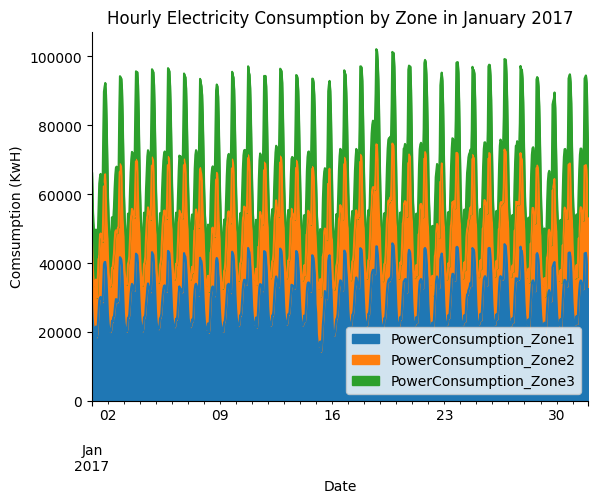

In [11]:
(pconsum
 .set_index("Datetime")
 .resample("h")
 ["PowerConsumption_Zone1","PowerConsumption_Zone2","PowerConsumption_Zone3"]
 .mean()
 .loc["2017-01"]
 .plot
 .area(
     title='Hourly Electricity Consumption by Zone in January 2017',
     xlabel='Date',
     ylabel='Comsumption (KwH)'
 )
)
sns.despine()

In [24]:
dows = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pconsum['day_name']= pd.Categorical(pconsum['Datetime'].dt.day_name(), categories=dows)

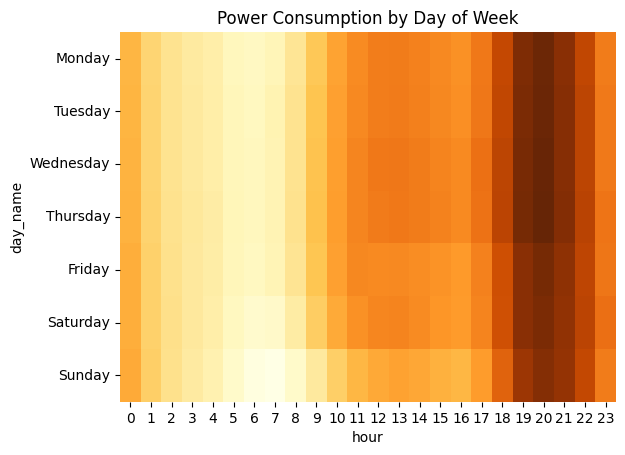

In [28]:
sns.heatmap(
    pconsum.pivot_table(
        index="day_name",
        columns="hour",
        values="total_consum",
        aggfunc="mean",
    observed=False),
    cbar=None,
    cmap="YlOrBr"
).set(title="Power Consumption by Day of Week");
